In [42]:
import pandas as pd

# Path to your Excel file
file_path = 'Datepanel2021_2023.xlsx'

# Load the Excel file
xlsx = pd.ExcelFile(file_path)

# Dictionary to store data from each sheet
data_frames = {}

# Read each sheet into a DataFrame
for sheet_name in xlsx.sheet_names:
    df = pd.read_excel(xlsx, sheet_name=sheet_name)
    df['Year'] = int(sheet_name)  # Add a year column based on the sheet name
    data_frames[sheet_name] = df

# Combine all DataFrames into a single DataFrame
combined_data = pd.concat(data_frames.values(), ignore_index=False)




In [43]:
combined_data

,EU countries,Enterprises use at least one of the AI technologies,GDP at market prices mil EUR,Real GDP growth rate - volume %,Enterprises use DSL or other fixed broadband connection %,MAX speed is less than 30 Mb/s %,MAX speed is at least 100 Mb/s but less than 500 Mb/s %,Max speed is at least 500 Mb/s but less than 1 Gb/s %,Max speed is at least 1 Gb/s %,Individuals used the internet on a desktop computer %,Individuals used the internet on a laptop %,Individuals used the internet on a tablet %,Individuals used the internet on a smartphone %,Individuals used the internet on a mobile device %,Individuals used the internet on other mobile device %,Volume indices of real expenditure per capita (in PPS_EU27_2020=100),HICP - annual data (average index and rate of change),Year
0,Austria,8.8,405241.4,4.2,89.7,11.3,28.4,6.0,6.0,41.29,57.43,31.84,87.84,90.94,29.16,122,111.46,2021
1,Belgium,10.3,507929.6,6.9,97.1,7.7,36.7,18.6,12.6,32.18,63.49,35.31,83.19,90.20,34.67,120,111.71,2021
2,Bulgaria,3.3,71060.1,7.7,85.7,10.0,24.7,7.7,7.4,25.64,30.71,10.83,71.84,73.49,6.04,57,109.30,2021
3,Croatia,8.7,58455.1,13.8,94.4,32.1,16.8,7.0,4.2,70.59,32.92,17.41,68.80,80.94,6.54,70,105.82,2021
4,Cyprus,2.6,24927.6,9.9,96.6,15.5,30.3,7.9,6.7,22.63,53.84,31.78,89.59,90.66,36.33,94,101.92,2021
5,Czechia,4.5,238249.5,3.6,91.9,17.2,23.8,6.4,8.1,43.80,66.99,27.41,78.66,85.36,46.87,92,115.10,2021
6,Denmark,23.9,342961.7,6.8,99.9,3.6,40.6,18.3,21.1,28.38,73.36,45.82,91.26,97.09,20.88,135,104.90,2021
7,Estonia,2.8,31169.0,7.2,93.9,11.7,31.3,5.2,3.2,36.44,61.76,24.46,80.26,87.32,28.39,86,114.72,2021
8,Finland,15.8,250664.0,2.8,94.5,4.0,38.2,11.2,11.8,32.83,73.34,41.20,89.99,96.25,66.97,112,106.12,2021
9,France,6.7,2502118.0,6.4,94.7,17.3,22.3,16.2,15.1,36.38,61.17,32.85,80.12,87.61,19.22,103,107.68,2021


In [44]:
# Set multi-index: Country and Year
combined_data.set_index(['EU countries', 'Year'], inplace=True)
# Rename the dependent variable to 'Y'\
'''
combined_data.rename(columns={'Enterprises use at least one of the AI technologies - data only for 21 and 23': 'Y'},\
                     inplace=True)
'''

combined_data['const'] = 1
# Define a list to hold the new column names, starting with 'Y'
'''
new_column_names = ['Y']

# Generate new names for the independent variables based on their order
# Exclude the dependent variable, constant, and any non-independent variables
independent_vars = [col for col in combined_data.columns if col not in ['Y', 'const', 'AnyOtherNonIndependentVar']]
new_column_names.extend([f'X{i}' for i in range(1, len(independent_vars) + 1)])

# Include 'const' at the end if it's part of your model
if 'const' in combined_data.columns:
    new_column_names.append('const')

# Create a dictionary mapping old column names to new column names
rename_mapping = dict(zip(['Y'] + independent_vars + (['const'] if 'const' in combined_data.columns else []), new_column_names))

# Rename the columns in the DataFrame
combined_data.rename(columns=rename_mapping, inplace=True)

# Verify the new column names
print(combined_data.columns)
'''

"\nnew_column_names = ['Y']\n\n# Generate new names for the independent variables based on their order\n# Exclude the dependent variable, constant, and any non-independent variables\nindependent_vars = [col for col in combined_data.columns if col not in ['Y', 'const', 'AnyOtherNonIndependentVar']]\nnew_column_names.extend([f'X{i}' for i in range(1, len(independent_vars) + 1)])\n\n# Include 'const' at the end if it's part of your model\nif 'const' in combined_data.columns:\n    new_column_names.append('const')\n\n# Create a dictionary mapping old column names to new column names\nrename_mapping = dict(zip(['Y'] + independent_vars + (['const'] if 'const' in combined_data.columns else []), new_column_names))\n\n# Rename the columns in the DataFrame\ncombined_data.rename(columns=rename_mapping, inplace=True)\n\n# Verify the new column names\nprint(combined_data.columns)\n"

In [45]:
combined_data

,,Enterprises use at least one of the AI technologies,GDP at market prices mil EUR,Real GDP growth rate - volume %,Enterprises use DSL or other fixed broadband connection %,MAX speed is less than 30 Mb/s %,MAX speed is at least 100 Mb/s but less than 500 Mb/s %,Max speed is at least 500 Mb/s but less than 1 Gb/s %,Max speed is at least 1 Gb/s %,Individuals used the internet on a desktop computer %,Individuals used the internet on a laptop %,Individuals used the internet on a tablet %,Individuals used the internet on a smartphone %,Individuals used the internet on a mobile device %,Individuals used the internet on other mobile device %,Volume indices of real expenditure per capita (in PPS_EU27_2020=100),HICP - annual data (average index and rate of change),const
EU countries,Year,,,,,,,,,,,,,,,,,
Austria,2021,8.8,405241.4,4.2,89.7,11.3,28.4,6.0,6.0,41.29,57.43,31.84,87.84,90.94,29.16,122,111.46,1
Belgium,2021,10.3,507929.6,6.9,97.1,7.7,36.7,18.6,12.6,32.18,63.49,35.31,83.19,90.20,34.67,120,111.71,1
Bulgaria,2021,3.3,71060.1,7.7,85.7,10.0,24.7,7.7,7.4,25.64,30.71,10.83,71.84,73.49,6.04,57,109.30,1
Croatia,2021,8.7,58455.1,13.8,94.4,32.1,16.8,7.0,4.2,70.59,32.92,17.41,68.80,80.94,6.54,70,105.82,1
Cyprus,2021,2.6,24927.6,9.9,96.6,15.5,30.3,7.9,6.7,22.63,53.84,31.78,89.59,90.66,36.33,94,101.92,1
Czechia,2021,4.5,238249.5,3.6,91.9,17.2,23.8,6.4,8.1,43.80,66.99,27.41,78.66,85.36,46.87,92,115.10,1
Denmark,2021,23.9,342961.7,6.8,99.9,3.6,40.6,18.3,21.1,28.38,73.36,45.82,91.26,97.09,20.88,135,104.90,1
Estonia,2021,2.8,31169.0,7.2,93.9,11.7,31.3,5.2,3.2,36.44,61.76,24.46,80.26,87.32,28.39,86,114.72,1
Finland,2021,15.8,250664.0,2.8,94.5,4.0,38.2,11.2,11.8,32.83,73.34,41.20,89.99,96.25,66.97,112,106.12,1


In [46]:
import pandas as pd
! pip install linearmodels
from linearmodels.panel import PanelOLS, RandomEffects
from linearmodels.panel import compare
from scipy import stats
import numpy as np

# Ensure 'df' is your DataFrame with 'entity' and 'year' as MultiIndex
# df.set_index(['entity', 'year'], inplace=True)


In [47]:
Y = combined_data['Enterprises use at least one of the AI technologies']
X = combined_data.drop(columns=['Enterprises use at least one of the AI technologies'])  # This includes 'const' and other independent variables
X=X[[ 'MAX speed is at least 100 Mb/s but less than 500 Mb/s %',

'Individuals used the internet on a laptop %',
'Individuals used the internet on other mobile device %', 'const']]


In [48]:
import pandas as pd

# Assuming 'data' is your DataFrame
correlation_matrix = X.corr()

# Display the correlation matrix
print(correlation_matrix)


                                                    MAX speed is at least 100 Mb/s but less than 500 Mb/s %  \
MAX speed is at least 100 Mb/s but less than 50...                                           1.000000         
Individuals used the internet on a laptop %                                                  0.289432         
Individuals used the internet on other mobile d...                                           0.406162         
const                                                                                             NaN         

                                                    Individuals used the internet on a laptop %  \
MAX speed is at least 100 Mb/s but less than 50...                                     0.289432   
Individuals used the internet on a laptop %                                            1.000000   
Individuals used the internet on other mobile d...                                     0.654646   
const                                           

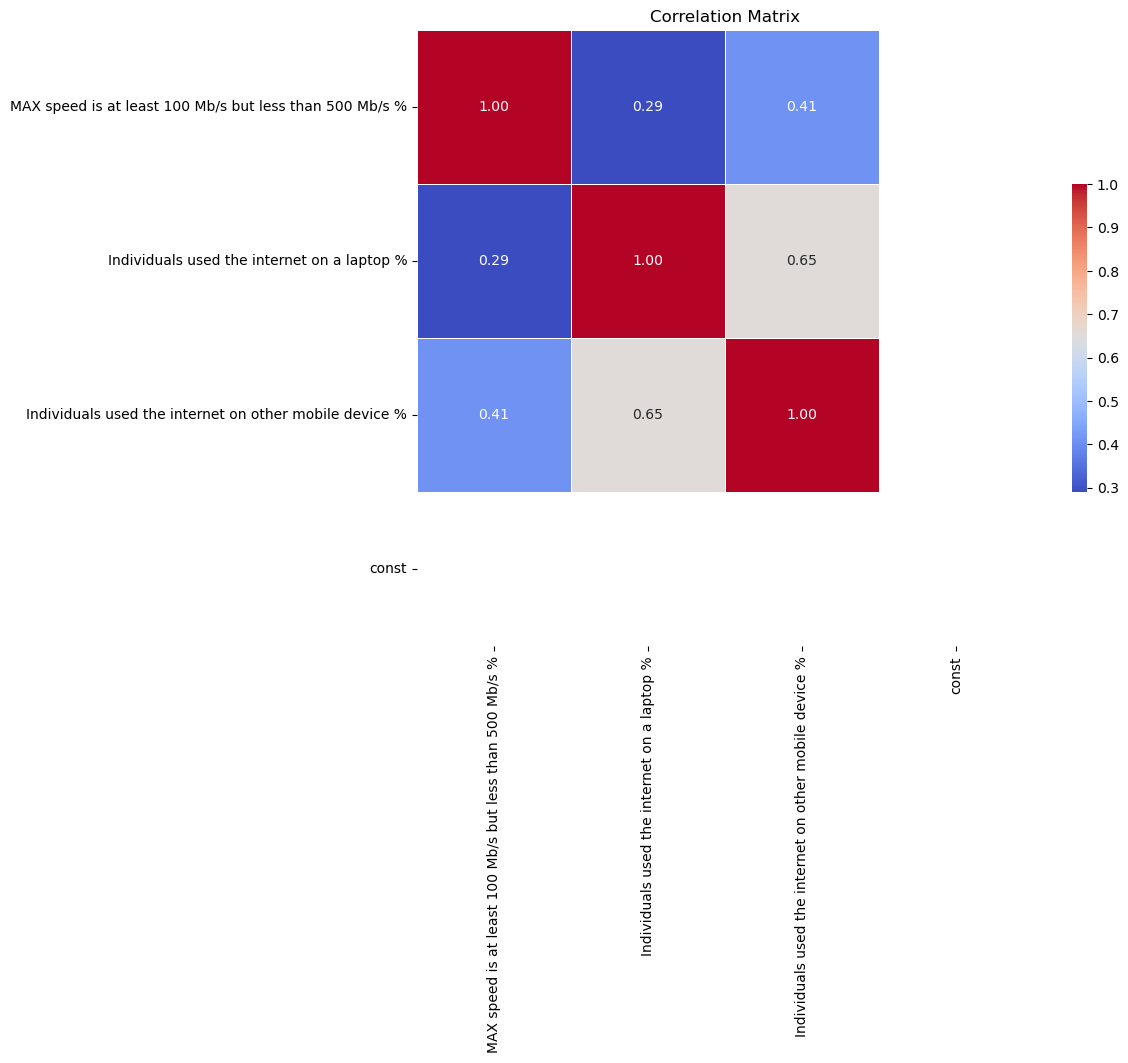

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Add title
plt.title('Correlation Matrix')

plt.show()


In [50]:
fe_model = PanelOLS(Y, X, entity_effects=True)
fe_results = fe_model.fit()
print(fe_results)


                                           PanelOLS Estimation Summary                                           
Dep. Variable:     Enterprises use at least one of the AI technologies   R-squared:                        0.2973
Estimator:                                                    PanelOLS   R-squared (Between):             -0.3455
No. Observations:                                                   54   R-squared (Within):               0.2973
Date:                                                 Mon, Apr 14 2025   R-squared (Overall):             -0.3078
Time:                                                         11:45:45   Log-likelihood                   -72.030
Cov. Estimator:                                             Unadjusted                                           
                                                                         F-statistic:                      3.3845
Entities:                                                           27   P-value        

In [51]:
re_model = RandomEffects(Y, X)
re_results = re_model.fit()
print(re_results)


                                         RandomEffects Estimation Summary                                        
Dep. Variable:     Enterprises use at least one of the AI technologies   R-squared:                        0.1938
Estimator:                                               RandomEffects   R-squared (Between):              0.2937
No. Observations:                                                   54   R-squared (Within):               0.0762
Date:                                                 Mon, Apr 14 2025   R-squared (Overall):              0.2809
Time:                                                         11:45:45   Log-likelihood                   -96.754
Cov. Estimator:                                             Unadjusted                                           
                                                                         F-statistic:                      4.0066
Entities:                                                           27   P-value        

In [52]:
def hausman(fe, re):
    """Compute Hausman test for fixed effects/random effects models comparison"""
    # Coefficients difference
    b = fe.params - re.params
    
    # Variance difference
    v_b = fe.cov - re.cov
    
    # Hausman statistic
    hausman_stat = np.dot(np.dot(b.T, np.linalg.inv(v_b)), b)
    
    # Degrees of freedom
    df = b.shape[0]
    
    # p-value
    p_value = stats.chi2.sf(hausman_stat, df)
    
    return hausman_stat, p_value

hausman_stat, p_value = hausman(fe_results, re_results)
print(f"Hausman Test Statistic: {hausman_stat}")
print(f"P-value: {p_value}")


Hausman Test Statistic: 15.157276082794045
P-value: 0.004385889263912985


Loaded shapefile with 177 countries

=== AI Adoption Statistics ===

2021 Clusters:
  Low Adoption: 20 countries
  Moderate Adoption: 5 countries
  High Adoption: 1 countries

2023 Clusters:
  Low Adoption: 14 countries
  High Adoption: 7 countries
  Moderate Adoption: 5 countries

Changes from 2021 to 2023:
  No Change (0): 17 countries
  Increased (1): 6 countries
  Increased (2): 3 countries

Countries that changed clusters:
  Luxembourg: Low Adoption → High Adoption
  Netherlands: Low Adoption → High Adoption
  Sweden: Low Adoption → High Adoption
  Belgium: Moderate Adoption → High Adoption
  Germany: Moderate Adoption → High Adoption
  Finland: Moderate Adoption → High Adoption
  Ireland: Low Adoption → Moderate Adoption
  Portugal: Low Adoption → Moderate Adoption
  Slovakia: Low Adoption → Moderate Adoption

Exported data to ai_adoption_data.csv
Saved map to output/ai_adoption_clusters_2021.png


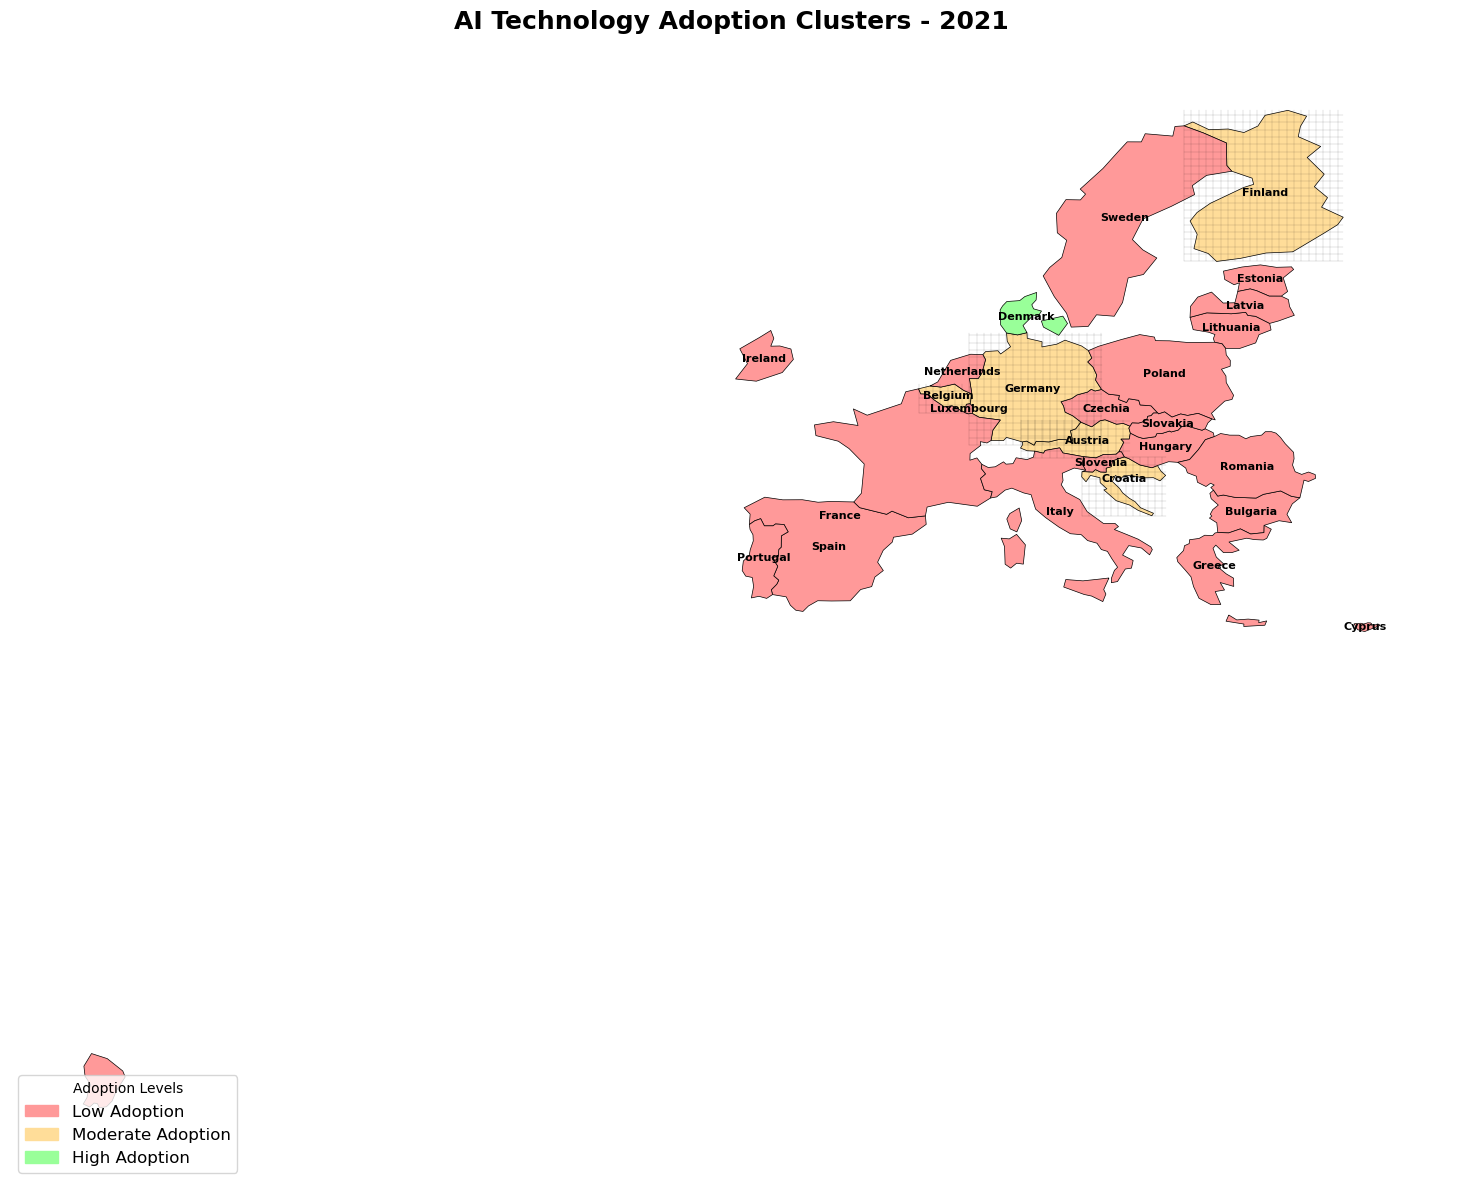

Saved map to output/ai_adoption_clusters_2023.png


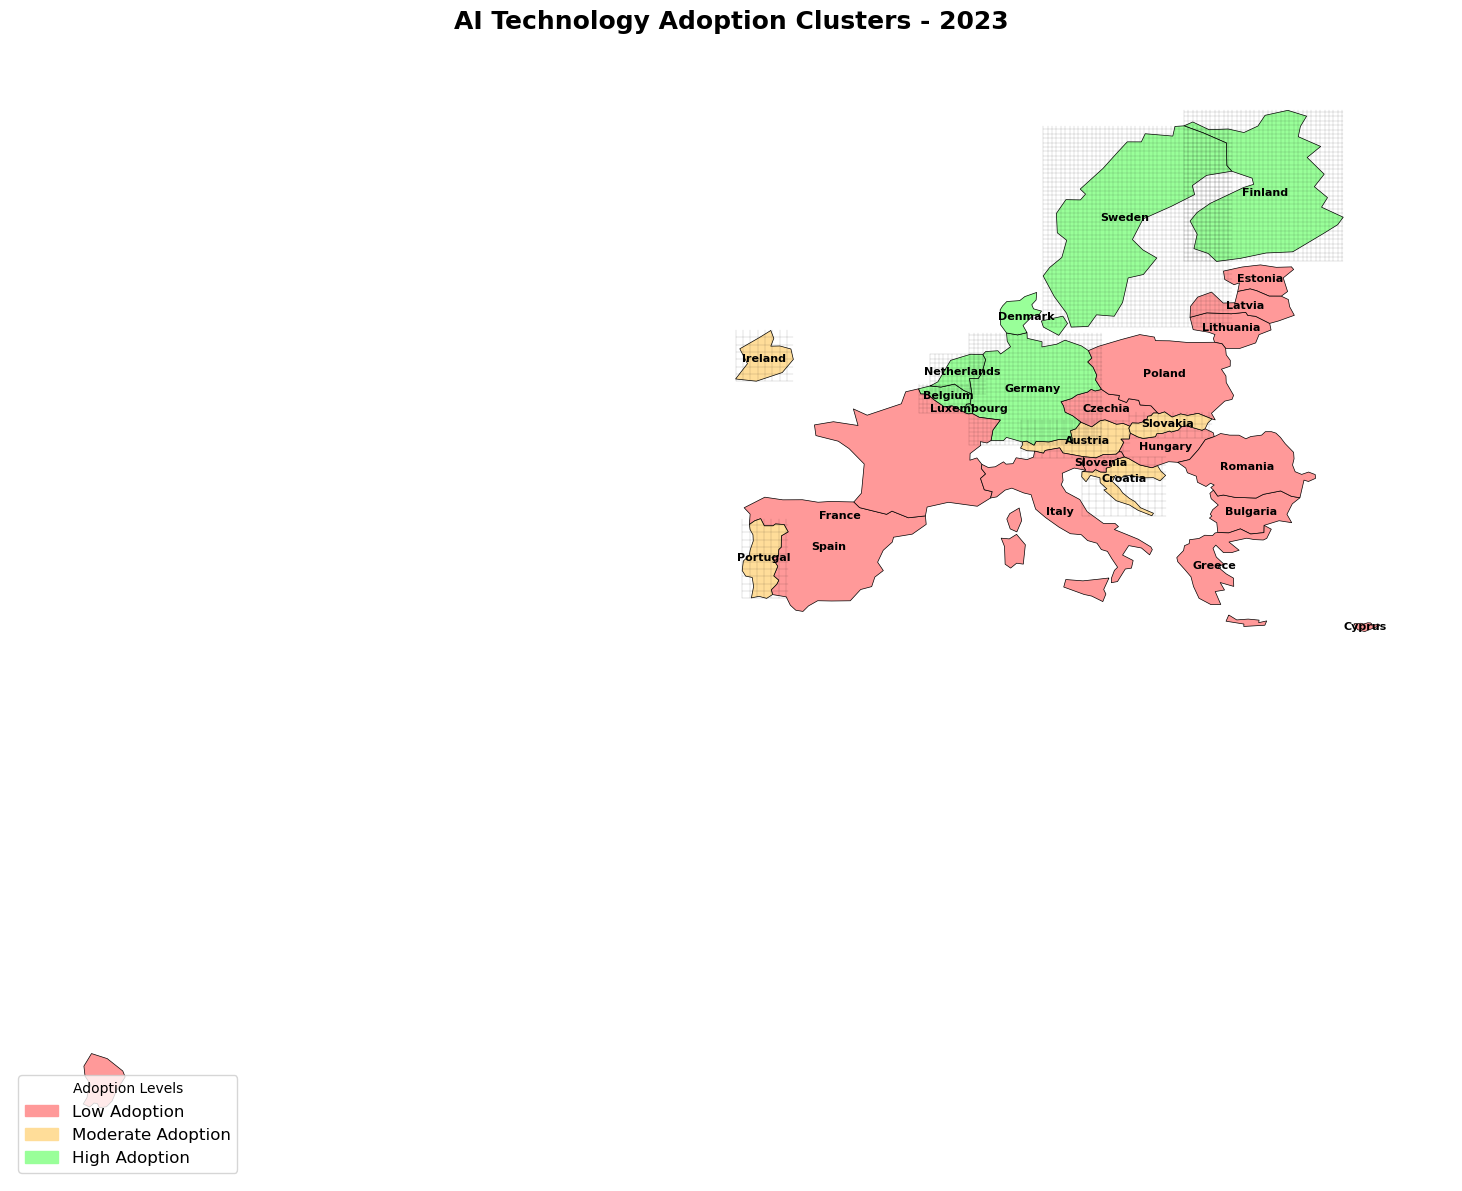

Saved changes map to output/ai_adoption_changes.png


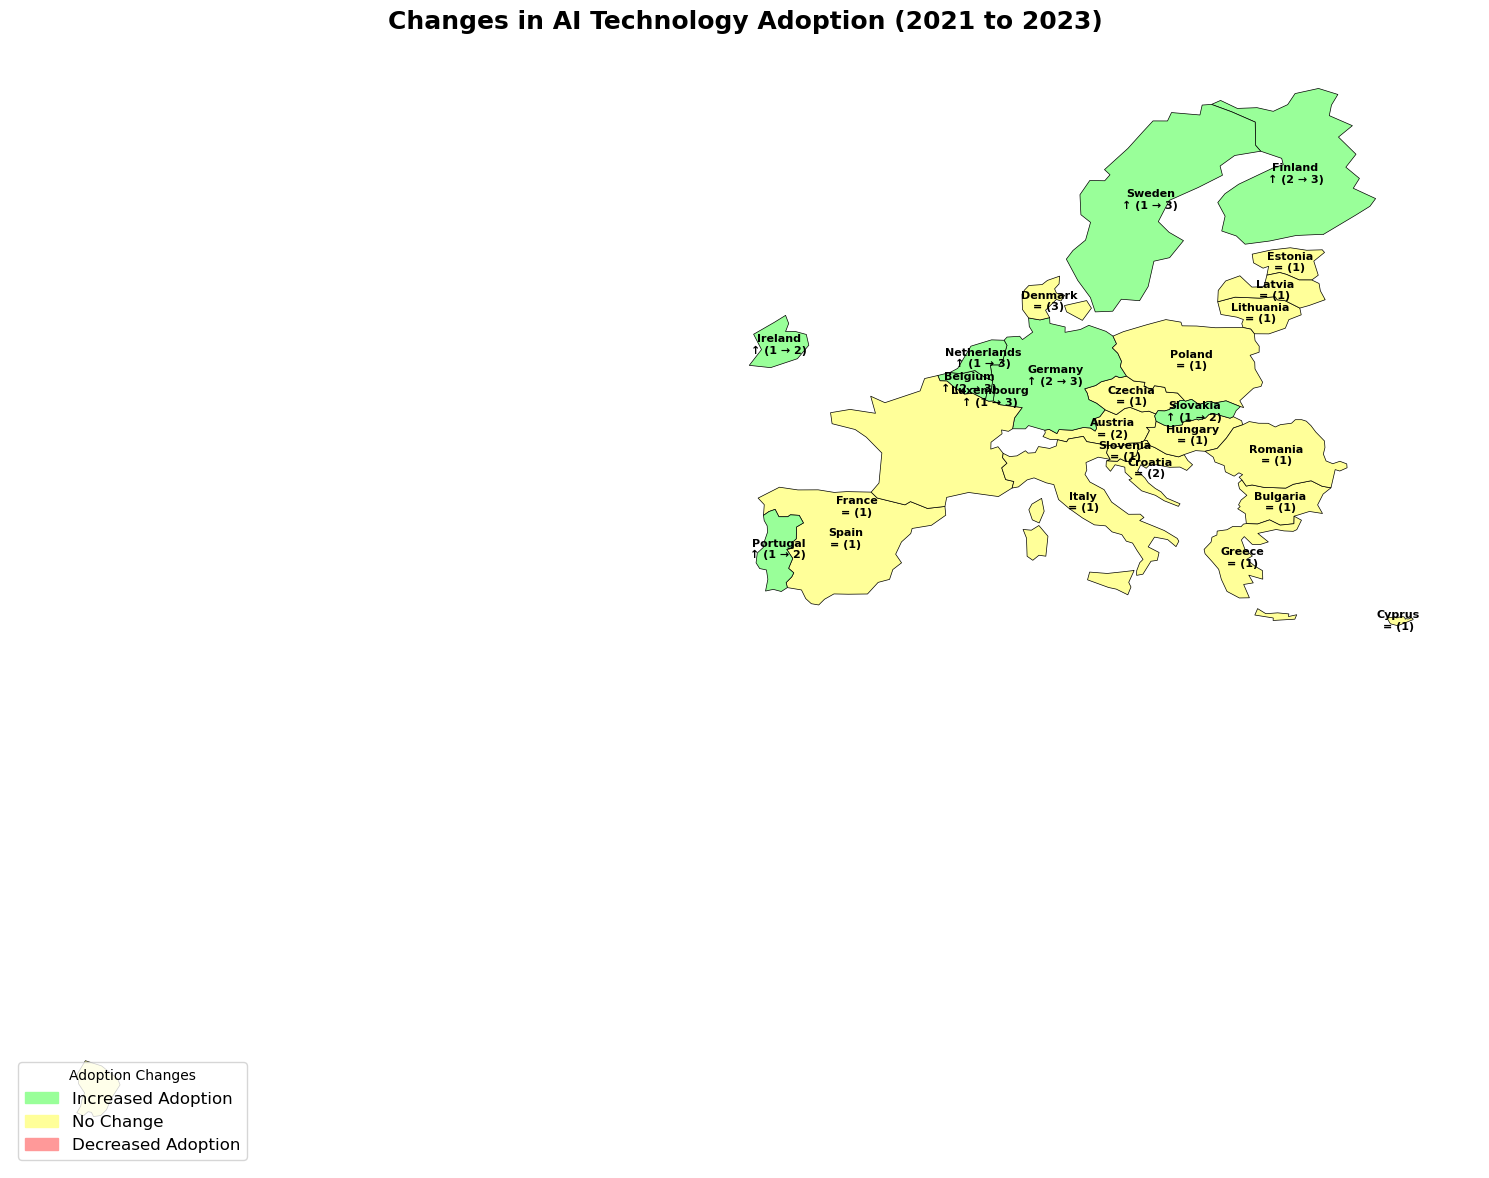

In [53]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
import pandas as pd
import os
from shapely.geometry import Polygon
from pathlib import Path

def load_shapefile(filepath):
    """
    Load the world shapefile and validate it exists.
    
    Args:
        filepath: Path to the shapefile
        
    Returns:
        GeoDataFrame with world data
    """
    if not os.path.exists(filepath):
        raise FileNotFoundError(f"Shapefile not found at: {filepath}. Please provide a valid path.")
    
    world = gpd.read_file(filepath)
    print(f"Loaded shapefile with {len(world)} countries")
    return world

def get_european_data(world, country_name_field='name'):
    """
    Filter to European countries of interest.
    
    Args:
        world: World GeoDataFrame
        country_name_field: Column containing country names
        
    Returns:
        Filtered GeoDataFrame with only European countries
    """
    european_countries = [
        'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia',
        'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia',
        'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania',
        'Slovakia', 'Slovenia', 'Spain', 'Sweden'
    ]
    
    # Create a mapping for country names that might differ in the dataset
    name_mapping = {
        'Czechia': ['Czech Republic', 'Czechia'],
        'United Kingdom': ['UK', 'United Kingdom', 'Great Britain']
    }
    
    # Create a set of all possible names to check against
    all_names = set()
    for country in european_countries:
        if country in name_mapping:
            all_names.update(name_mapping[country])
        else:
            all_names.add(country)
    
    # Check if we can find all countries in the dataset
    available_countries = set(world[country_name_field].unique())
    found = all_names.intersection(available_countries)
    missing = set(european_countries) - set(c for c in european_countries if c in found or any(m in found for m in name_mapping.get(c, [])))
    
    if missing:
        print(f"Warning: Missing {len(missing)} countries in the dataset: {', '.join(missing)}")
        
        #print(f"Available countries in dataset: {', '.join(sorted(available_countries))}")
    
    # Filter to only European countries
    europe = world[world[country_name_field].isin(all_names)].copy()
    
    # Standardize country names if needed
    for standard_name, variants in name_mapping.items():
        europe.loc[europe[country_name_field].isin(variants), country_name_field] = standard_name
    
    return europe

def get_adoption_clusters():
    """Define AI adoption clusters for 2021 and 2023"""
    clusters_2021 = {
        'Low Adoption': ['Bulgaria', 'Cyprus', 'Czechia', 'Estonia', 'France', 'Greece', 'Hungary', 'Ireland', 'Italy',
                         'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania',
                         'Slovakia', 'Slovenia', 'Spain', 'Sweden'],
        'Moderate Adoption': ['Austria', 'Belgium', 'Croatia', 'Finland', 'Germany'],
        'High Adoption': ['Denmark']
    }

    clusters_2023 = {
        'Low Adoption': ['Bulgaria', 'Cyprus', 'Czechia', 'Estonia', 'France', 'Greece', 'Hungary', 'Italy', 'Latvia',
                         'Lithuania', 'Malta', 'Poland', 'Romania', 'Slovenia', 'Spain'],
        'Moderate Adoption': ['Austria', 'Croatia', 'Ireland', 'Portugal', 'Slovakia'],
        'High Adoption': ['Belgium', 'Denmark', 'Finland', 'Germany', 'Luxembourg', 'Netherlands', 'Sweden']
    }
    
    # Validate clusters for consistency
    all_countries = set()
    for cluster, countries in clusters_2021.items():
        all_countries.update(countries)
    
    for cluster, countries in clusters_2023.items():
        for country in countries:
            if country not in all_countries:
                print(f"Warning: Country '{country}' in 2023 clusters not found in 2021 clusters")
    
    # Convert clusters to numeric values for easier analysis
    numeric_mapping = {'Low Adoption': 1, 'Moderate Adoption': 2, 'High Adoption': 3}
    
    # Create lookup dictionaries for faster assignment
    country_to_cluster_2021 = {}
    country_to_cluster_2023 = {}
    
    for cluster, countries in clusters_2021.items():
        for country in countries:
            country_to_cluster_2021[country] = cluster
    
    for cluster, countries in clusters_2023.items():
        for country in countries:
            country_to_cluster_2023[country] = cluster
    
    return clusters_2021, clusters_2023, country_to_cluster_2021, country_to_cluster_2023, numeric_mapping

def prepare_europe_with_clusters(europe, country_to_cluster_2021, country_to_cluster_2023, numeric_mapping, country_name_field='name'):
    """
    Prepare European data with cluster assignments and derived fields.
    
    Args:
        europe: GeoDataFrame with European countries
        country_to_cluster_*: Dictionaries mapping country names to clusters
        numeric_mapping: Dictionary mapping cluster names to numeric values
        country_name_field: Column containing country names
        
    Returns:
        GeoDataFrame with added cluster and color columns
    """
    # Define color scheme
    colors = {
        'Low Adoption': '#FF9999',       # Light red
        'Moderate Adoption': '#FFDD99',  # Light orange/yellow
        'High Adoption': '#99FF99',      # Light green
        'Not Classified': '#EEEEEE'      # Light grey
    }
    
    # Add columns for both years
    europe['Cluster_2021'] = europe[country_name_field].map(
        lambda x: country_to_cluster_2021.get(x, 'Not Classified'))
    europe['Cluster_2023'] = europe[country_name_field].map(
        lambda x: country_to_cluster_2023.get(x, 'Not Classified'))
    
    # Add numeric values for analysis
    europe['Value_2021'] = europe['Cluster_2021'].map(
        lambda x: numeric_mapping.get(x, 0))
    europe['Value_2023'] = europe['Cluster_2023'].map(
        lambda x: numeric_mapping.get(x, 0))
    
    # Calculate change
    europe['Change'] = europe['Value_2023'] - europe['Value_2021']
    
    # Add color mappings
    europe['Color_2021'] = europe['Cluster_2021'].map(colors)
    europe['Color_2023'] = europe['Cluster_2023'].map(colors)
    
    # Create label for change
    def change_label(row):
        if row['Change'] > 0:
            return f"↑ ({row['Value_2021']} → {row['Value_2023']})"
        elif row['Change'] < 0:
            return f"↓ ({row['Value_2021']} → {row['Value_2023']})"
        else:
            return f"= ({row['Value_2021']})"
    
    europe['Change_Label'] = europe.apply(change_label, axis=1)
    
    return europe, colors

def draw_grid(ax, geometry, spacing=1.0, color='black', alpha=0.4):
    """Draw a grid overlay on country polygons"""
    if isinstance(geometry, Polygon):
        bounds = geometry.bounds
        x_min, y_min, x_max, y_max = bounds
        
        # Draw vertical lines
        x = x_min
        while x < x_max:
            ax.plot([x, x], [y_min, y_max], color=color, linewidth=0.2, alpha=alpha)
            x += spacing
        
        # Draw horizontal lines
        y = y_min
        while y < y_max:
            ax.plot([x_min, x_max], [y, y], color=color, linewidth=0.2, alpha=alpha)
            y += spacing
            
def create_legend_items(colors):
    """Create legend items for the plot"""
    # Create legend handles for adoption clusters
    legend_patches = []
    
    for key, color in colors.items():
        if key != 'Not Classified':
            patch = mpatches.Patch(color=color, label=key)
            legend_patches.append(patch)
    
    return legend_patches

def plot_map(europe, year, cluster_column, color_column, legend_items, grid_spacing=0.5, 
             output_dir=None, show_plot=True, country_name_field='name'):
    """
    Plot the map for a specific year.
    
    Args:
        europe: GeoDataFrame with European countries and cluster data
        year: Year to display in the title
        cluster_column: Column containing cluster data
        color_column: Column containing color data 
        legend_items: Legend items to display
        grid_spacing: Spacing for grid overlay
        output_dir: Directory to save the plot (if None, won't save)
        show_plot: Whether to display the plot
        country_name_field: Column containing country names
    """
    fig, ax = plt.subplots(figsize=(15, 12))
    
    # Plot base map
    europe.plot(ax=ax, color=europe[color_column], edgecolor='black', linewidth=0.5)
    
    # Add grid overlays for Moderate & High Adoption
    for idx, row in europe.iterrows():
        if row[cluster_column] in ['Moderate Adoption', 'High Adoption']:
            # Use different grid patterns for moderate vs high
            spacing = 0.5 if row[cluster_column] == 'Moderate Adoption' else 0.3
            draw_grid(ax, row['geometry'], spacing=spacing, color='black')
    
    # Add country labels
    for idx, row in europe.iterrows():
        if row[cluster_column] != 'Not Classified':
            # Get centroid of country for label placement
            centroid = row['geometry'].centroid
            ax.text(centroid.x, centroid.y, row[country_name_field], 
                    horizontalalignment='center', verticalalignment='center',
                    fontsize=8, fontweight='bold')
    
    # Set title and styling
    ax.set_title(f'AI Technology Adoption Clusters - {year}', fontsize=18, fontweight='bold')
    ax.axis('off')
    
    # Add legend
    ax.legend(handles=legend_items, loc='lower left', frameon=True, 
              title='Adoption Levels', fontsize=12)
    
    # Add scale bar
    ax.set_xlim(europe.total_bounds[0]-5, europe.total_bounds[2]+5)
    ax.set_ylim(europe.total_bounds[1]-5, europe.total_bounds[3]+5)
    
    plt.tight_layout()
    
    # Save if output directory provided
    if output_dir:
        output_path = Path(output_dir) / f"ai_adoption_clusters_{year}.png"
        plt.savefig(output_path, dpi=300, bbox_inches='tight')
        print(f"Saved map to {output_path}")
    
    if show_plot:
        plt.show()
    else:
        plt.close()

def plot_changes_map(europe, legend_items, output_dir=None, show_plot=True):
    """Plot a map showing changes between 2021 and 2023"""
    fig, ax = plt.subplots(figsize=(15, 12))
    
    # Create a colormap for changes
    cmap = ListedColormap(['#FF9999', '#FFFF99', '#99FF99'])  # Red (decrease), Yellow (no change), Green (increase)
    
    # Normalize change values to -1, 0, 1 for coloring
    europe['change_color'] = europe['Change'].map(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))
    
    # Plot base map
    europe.plot(ax=ax, color=cmap(europe['change_color']/2 + 0.5), edgecolor='black', linewidth=0.5)
    
    # Add country labels with change indicators
    for idx, row in europe.iterrows():
        # Skip countries that aren't classified
        if row['Cluster_2021'] == 'Not Classified' and row['Cluster_2023'] == 'Not Classified':
            continue
            
        # Get centroid of country for label placement
        centroid = row['geometry'].centroid
        ax.text(centroid.x, centroid.y, f"{row['name']}\n{row['Change_Label']}", 
                horizontalalignment='center', verticalalignment='center',
                fontsize=8, fontweight='bold')
    
    # Create legend for changes
    change_patches = [
        mpatches.Patch(color='#99FF99', label='Increased Adoption'),
        mpatches.Patch(color='#FFFF99', label='No Change'),
        mpatches.Patch(color='#FF9999', label='Decreased Adoption')
    ]
    
    # Set title and styling
    ax.set_title('Changes in AI Technology Adoption (2021 to 2023)', fontsize=18, fontweight='bold')
    ax.axis('off')
    
    # Add legend
    ax.legend(handles=change_patches, loc='lower left', frameon=True, 
              title='Adoption Changes', fontsize=12)
    
    plt.tight_layout()
    
    # Save if output directory provided
    if output_dir:
        output_path = Path(output_dir) / "ai_adoption_changes.png"
        plt.savefig(output_path, dpi=300, bbox_inches='tight')
        print(f"Saved changes map to {output_path}")
    
    if show_plot:
        plt.show()
    else:
        plt.close()

def generate_statistics(europe):
    """Generate and print statistics about the clusters"""
    # Count countries in each cluster by year
    counts_2021 = europe['Cluster_2021'].value_counts().drop('Not Classified', errors='ignore')
    counts_2023 = europe['Cluster_2023'].value_counts().drop('Not Classified', errors='ignore')
    
    # Calculate changes
    changes = europe['Change'].value_counts().sort_index()
    
    # Print statistics
    print("\n=== AI Adoption Statistics ===")
    print("\n2021 Clusters:")
    for cluster, count in counts_2021.items():
        print(f"  {cluster}: {count} countries")
    
    print("\n2023 Clusters:")
    for cluster, count in counts_2023.items():
        print(f"  {cluster}: {count} countries")
    
    print("\nChanges from 2021 to 2023:")
    for change, count in changes.items():
        label = "Increased" if change > 0 else ("Decreased" if change < 0 else "No Change")
        print(f"  {label} ({change}): {count} countries")
    
    # Create a DataFrame showing countries that changed clusters
    changed = europe[europe['Change'] != 0].copy()
    if not changed.empty:
        print("\nCountries that changed clusters:")
        for _, row in changed.sort_values('Change', ascending=False).iterrows():
            print(f"  {row['name']}: {row['Cluster_2021']} → {row['Cluster_2023']}")
    
    # Export to CSV
    europe.to_csv("ai_adoption_data.csv", columns=['name', 'Cluster_2021', 'Value_2021', 
                                                   'Cluster_2023', 'Value_2023', 'Change'], 
                  index=False)
    print("\nExported data to ai_adoption_data.csv")

# -------------------------------------------------------------
# Cell execution code - use this in a Jupyter notebook
# -------------------------------------------------------------

# Set the output directory for saving plots (optional)
output_dir = "output"  # Set to None to disable saving
if output_dir:
    os.makedirs(output_dir, exist_ok=True)

# Load data
shapefile_path = "ne_110m_admin_0_countries.shp"
world = load_shapefile(shapefile_path)

# Get European data
country_name_field = 'name'  # Adjust based on shapefile attributes
europe = get_european_data(world, country_name_field)

# Get cluster definitions
clusters_2021, clusters_2023, country_to_cluster_2021, country_to_cluster_2023, numeric_mapping = get_adoption_clusters()

# Prepare data
europe, colors = prepare_europe_with_clusters(
    europe, country_to_cluster_2021, country_to_cluster_2023, 
    numeric_mapping, country_name_field
)

# Create legend items
legend_items = create_legend_items(colors)

# Generate statistics
generate_statistics(europe)

# Plot maps
plot_map(europe, 2021, 'Cluster_2021', 'Color_2021', legend_items, output_dir=output_dir)
plot_map(europe, 2023, 'Cluster_2023', 'Color_2023', legend_items, output_dir=output_dir)

# Plot changes map
plot_changes_map(europe, legend_items, output_dir=output_dir)


In [54]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the provided Excel file
file_path = 'Datepanel2021_2023.xlsx'
data = pd.read_excel(file_path, sheet_name=None)

# Extracting data for 2021 and 2023
data_2021 = data['2021']
data_2023 = data['2023']

# Dropping the first two columns (Country and AI technology adoption)
X_2021 = data_2021.iloc[:, 2:]
X_2023 = data_2023.iloc[:, 2:]

# Standardize the data
scaler = StandardScaler()
X_2021_standardized = scaler.fit_transform(X_2021)
X_2023_standardized = scaler.fit_transform(X_2023)

# Perform PCA to get only the first 3 principal components
pca_2021_3pc = PCA(n_components=5)
X_2021_pca_3pc = pca_2021_3pc.fit_transform(X_2021_standardized)

pca_2023_3pc = PCA(n_components=5)
X_2023_pca_3pc = pca_2023_3pc.fit_transform(X_2023_standardized)

# Explained variance ratios for the first 3 principal components
explained_variance_2021_3pc = pca_2021_3pc.explained_variance_ratio_
explained_variance_2023_3pc = pca_2023_3pc.explained_variance_ratio_

# Calculate the total explained variance by the first 3 principal components
total_explained_variance_2021 = np.sum(explained_variance_2021_3pc)
total_explained_variance_2023 = np.sum(explained_variance_2023_3pc)

print(f"Total explained variance by the first 3 principal components for 2021: {total_explained_variance_2021:.4f}")
print(f"Total explained variance by the first 3 principal components for 2023: {total_explained_variance_2023:.4f}")


Total explained variance by the first 3 principal components for 2021: 0.8129
Total explained variance by the first 3 principal components for 2023: 0.8155


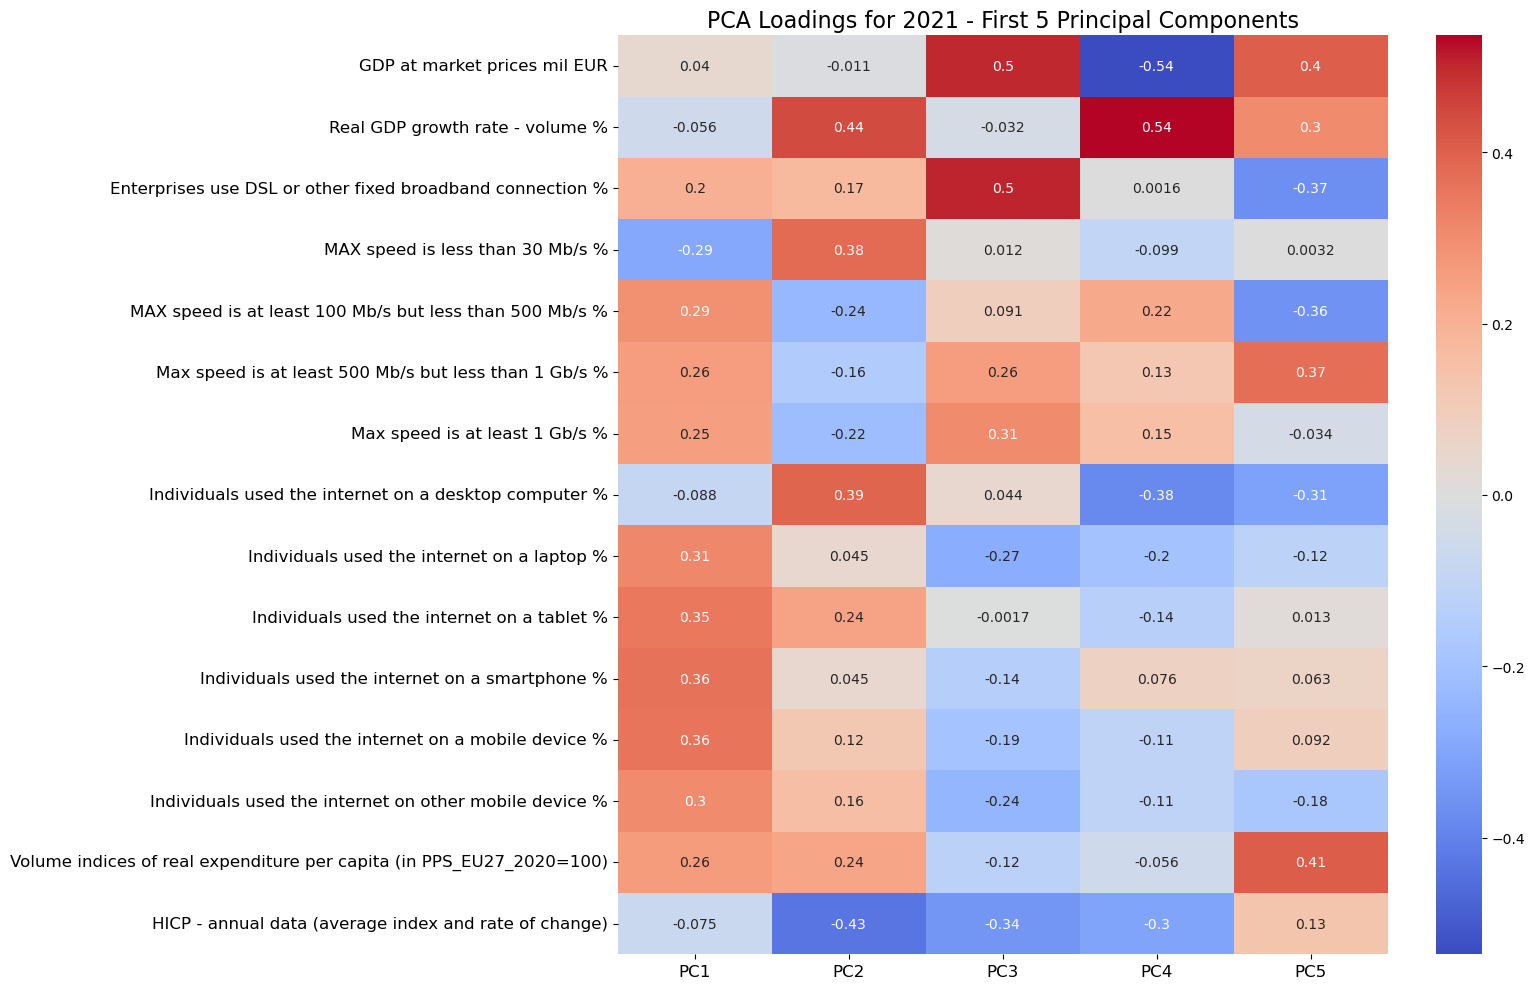

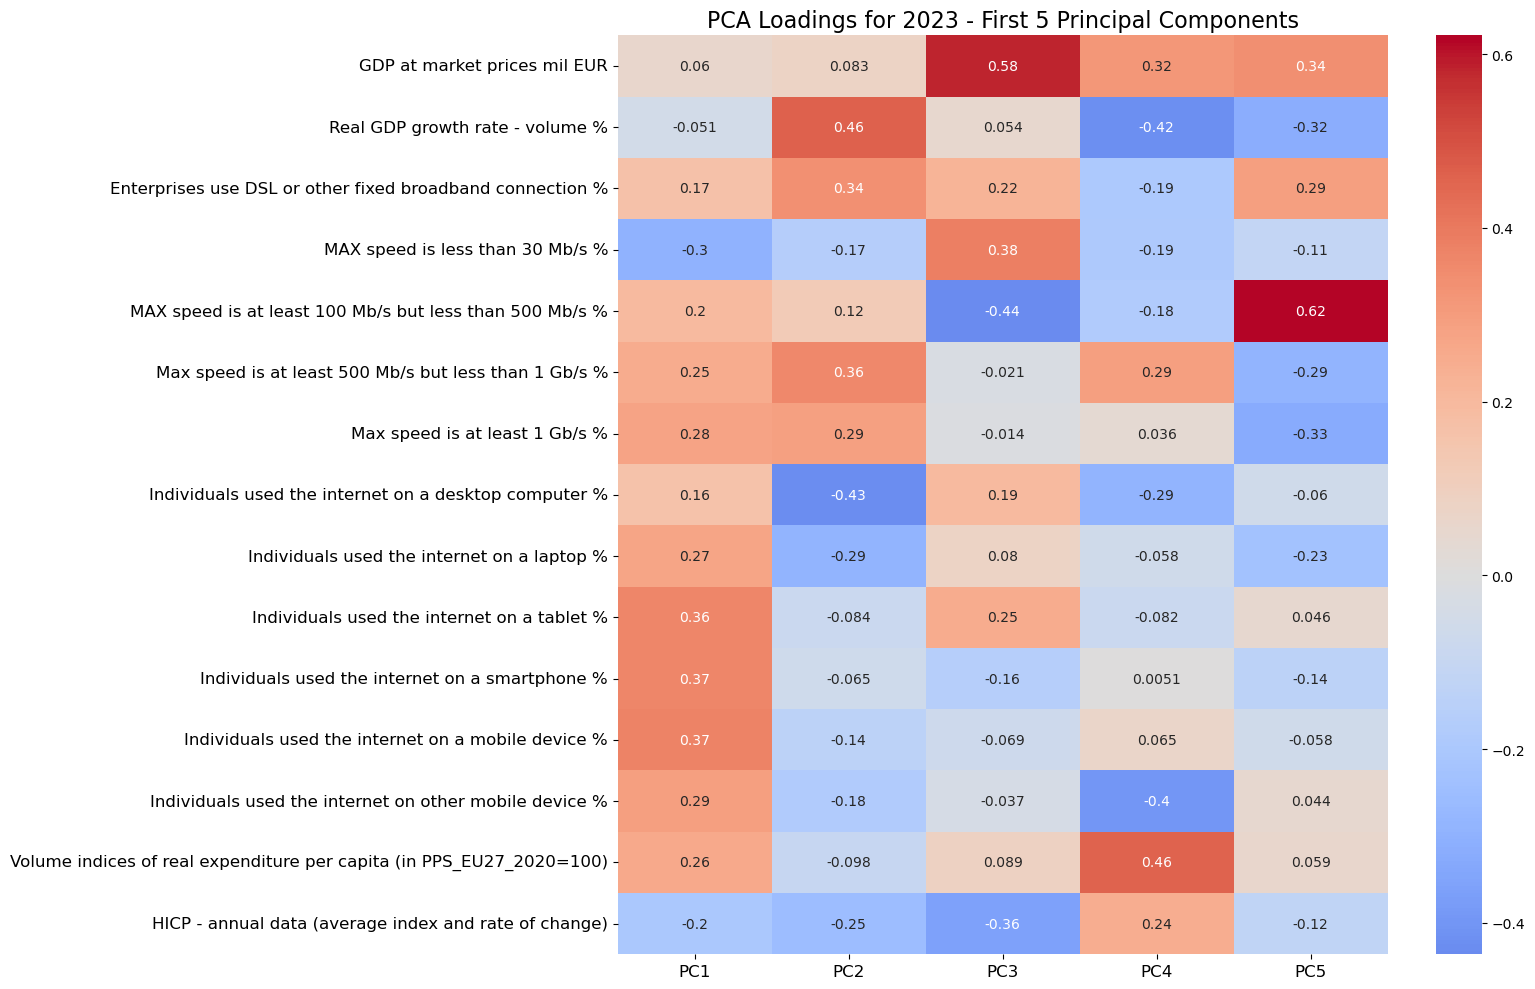

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming data_2021 and data_2023 are pre-loaded DataFrames

# Dropping the first two columns (Country and AI technology adoption)
X_2021 = data_2021.iloc[:, 2:]
X_2023 = data_2023.iloc[:, 2:]

# Standardize the data
scaler = StandardScaler()
X_2021_standardized = scaler.fit_transform(X_2021)
X_2023_standardized = scaler.fit_transform(X_2023)

# Perform PCA to get the first 5 principal components
pca_2021_5pc = PCA(n_components=5)
X_2021_pca_5pc = pca_2021_5pc.fit_transform(X_2021_standardized)

pca_2023_5pc = PCA(n_components=5)
X_2023_pca_5pc = pca_2023_5pc.fit_transform(X_2023_standardized)

# Get the loadings (principal component weights) for the first 5 principal components for 2021
loadings_2021_5pc = pca_2021_5pc.components_.T
loadings_df_2021_5pc = pd.DataFrame(loadings_2021_5pc, columns=[f'PC{i+1}' for i in range(loadings_2021_5pc.shape[1])], index=X_2021.columns)

# Get the loadings (principal component weights) for the first 5 principal components for 2023
loadings_2023_5pc = pca_2023_5pc.components_.T
loadings_df_2023_5pc = pd.DataFrame(loadings_2023_5pc, columns=[f'PC{i+1}' for i in range(loadings_2023_5pc.shape[1])], index=X_2023.columns)

# Plot heatmap of PCA loadings for 2021 with increased label size for readability
plt.figure(figsize=(16, 10))
sns.heatmap(loadings_df_2021_5pc, annot=True, cmap='coolwarm', center=0, annot_kws={"size": 10})
plt.title('PCA Loadings for 2021 - First 5 Principal Components', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('PCA_Loadings_2021_5PC.png', dpi=300, transparent=True)
plt.show()

# Plot heatmap of PCA loadings for 2023 with increased label size for readability
plt.figure(figsize=(16, 10))
sns.heatmap(loadings_df_2023_5pc, annot=True, cmap='coolwarm', center=0, annot_kws={"size": 10})
plt.title('PCA Loadings for 2023 - First 5 Principal Components', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('PCA_Loadings_2023_5PC.png', dpi=300, transparent=True)
plt.show()

# Save the loadings to CSV files for further analysis
loadings_df_2021_5pc.to_csv('PCA_Loadings_2021_5PC.csv')
loadings_df_2023_5pc.to_csv('PCA_Loadings_2023_5PC.csv')


In [56]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the provided Excel file
file_path = 'Datepanel2021_2023.xlsx'
data = pd.read_excel(file_path, sheet_name=None)

# Extracting data for 2021 and 2023
data_2021 = data['2021']
data_2023 = data['2023']

# Dropping the first two columns (Country and AI technology adoption)
X_2021 = data_2021.iloc[:, 2:]
X_2023 = data_2023.iloc[:, 2:]

# Standardize the data
scaler = StandardScaler()
X_2021_standardized = scaler.fit_transform(X_2021)
X_2023_standardized = scaler.fit_transform(X_2023)

# Perform PCA to get the first 5 principal components
pca_2021_5pc = PCA(n_components=5)
X_2021_pca_5pc = pca_2021_5pc.fit_transform(X_2021_standardized)

pca_2023_5pc = PCA(n_components=5)
X_2023_pca_5pc = pca_2023_5pc.fit_transform(X_2023_standardized)

# Define dependent variable for 2021 and 2023
y_2021 = data_2021['Enterprises use at least one of the AI technologies']
y_2023 = data_2023['Enterprises use at least one of the AI technologies']

# Add a constant to the PCA-transformed data
X_2021_pca_5pc = sm.add_constant(X_2021_pca_5pc)
X_2023_pca_5pc = sm.add_constant(X_2023_pca_5pc)

# Build the linear regression model for 2021 using the first 5 principal components
model_2021_pca = sm.OLS(y_2021, X_2021_pca_5pc).fit(cov_type='HC0')

# Build the linear regression model for 2023 using the first 5 principal components
model_2023_pca = sm.OLS(y_2023, X_2023_pca_5pc).fit(cov_type='HC0')

# Display the summaries of the regression models
print("Regression Model Summary for 2021:")
print(model_2021_pca.summary())

print("\nRegression Model Summary for 2023:")
print(model_2023_pca.summary())

# Save the regression summaries to text files
with open('Regression_Summary_2021.txt', 'w') as f:
    f.write(model_2021_pca.summary().as_text())

with open('Regression_Summary_2023.txt', 'w') as f:
    f.write(model_2023_pca.summary().as_text())



Regression Model Summary for 2021:
                                             OLS Regression Results                                            
Dep. Variable:     Enterprises use at least one of the AI technologies   R-squared:                       0.593
Model:                                                             OLS   Adj. R-squared:                  0.496
Method:                                                  Least Squares   F-statistic:                     8.846
Date:                                                 Mon, 14 Apr 2025   Prob (F-statistic):           0.000122
Time:                                                         11:45:59   Log-Likelihood:                -69.263
No. Observations:                                                   27   AIC:                             150.5
Df Residuals:                                                       21   BIC:                             158.3
Df Model:                                                            

In [57]:
! pip install linearmodels
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
from statsmodels.formula.api import ols
from linearmodels.panel import PanelOLS, RandomEffects

# Load the provided Excel file
file_path = 'Datepanel2021_2023.xlsx'
data = pd.read_excel(file_path, sheet_name=None)

# Combine data for 2021 and 2023
data_2021 = data['2021']
data_2023 = data['2023']

data_2021['Year'] = 2021
data_2023['Year'] = 2023

combined_data = pd.concat([data_2021, data_2023], ignore_index=True)

# Assuming the first column is the country identifier and the second column is AI adoption
combined_data = combined_data.rename(columns={combined_data.columns[0]: 'Country', combined_data.columns[1]: 'AI_Adoption'})

# Standardize the data for PCA (excluding Country, AI_Adoption, and Year)
features = combined_data.iloc[:, 2:].columns
scaler = StandardScaler()
combined_data[features] = scaler.fit_transform(combined_data[features])

# Perform PCA on the combined data
pca = PCA(n_components=5)
combined_data_pca = pca.fit_transform(combined_data[features])

# Create a DataFrame for the PCA components
pca_columns = [f'PC{i+1}' for i in range(combined_data_pca.shape[1])]
combined_data_pca_df = pd.DataFrame(combined_data_pca, columns=pca_columns)

# Combine the PCA components with the original data
combined_data = pd.concat([combined_data[['Country', 'Year', 'AI_Adoption']], combined_data_pca_df], axis=1)

# Set the index for panel data
combined_data.set_index(['Country', 'Year'], inplace=True)

# Fixed-effects model
fixed_effects_model = PanelOLS.from_formula('AI_Adoption ~ 1 + PC1 + PC2 + PC3 + PC4 + PC5 + EntityEffects', data=combined_data)
fixed_effects_results = fixed_effects_model.fit(cov_type='robust')

# Random-effects model
random_effects_model = RandomEffects.from_formula('AI_Adoption ~ 1 + PC1 + PC2 + PC3 + PC4 + PC5', data=combined_data)
random_effects_results = random_effects_model.fit(cov_type='robust')

print(fixed_effects_results.summary)
print(random_effects_results.summary)

# Save the results to text files
with open('Fixed_Effects_Results.txt', 'w') as f:
    f.write(fixed_effects_results.summary.as_text())

with open('Random_Effects_Results.txt', 'w') as f:
    f.write(random_effects_results.summary.as_text())


                          PanelOLS Estimation Summary                           
Dep. Variable:            AI_Adoption   R-squared:                        0.0794
Estimator:                   PanelOLS   R-squared (Between):             -0.1789
No. Observations:                  54   R-squared (Within):               0.0794
Date:                Mon, Apr 14 2025   R-squared (Overall):             -0.1638
Time:                        11:46:03   Log-likelihood                   -79.323
Cov. Estimator:                Robust                                           
                                        F-statistic:                      0.3793
Entities:                          27   P-value                           0.8575
Avg Obs:                       2.0000   Distribution:                    F(5,22)
Min Obs:                       2.0000                                           
Max Obs:                       2.0000   F-statistic (robust):             1.8204
                            

In [58]:
import pandas as pd
from linearmodels.panel import PanelOLS, RandomEffects, compare
from linearmodels.datasets import wage_panel

# Assuming 'combined_data' is your DataFrame and it has been preprocessed, PCA applied
# and set index to ['Country', 'Year']

# Load the provided Excel file
file_path = 'Datepanel2021_2023.xlsx'
data = pd.read_excel(file_path, sheet_name=None)

# Extracting data for 2021 and 2023
data_2021 = data['2021']
data_2023 = data['2023']

data_2021['Year'] = 2021
data_2023['Year'] = 2023

combined_data = pd.concat([data_2021, data_2023], ignore_index=True)

# Rename columns for consistency
combined_data = combined_data.rename(columns={combined_data.columns[0]: 'Country', combined_data.columns[1]: 'AI_Adoption'})

# Standardize the data for PCA (excluding Country, AI_Adoption, and Year)
features = combined_data.iloc[:, 2:].columns
scaler = StandardScaler()
combined_data[features] = scaler.fit_transform(combined_data[features])

# Perform PCA on the combined data
pca = PCA(n_components=5)
combined_data_pca = pca.fit_transform(combined_data[features])

# Create a DataFrame for the PCA components
pca_columns = [f'PC{i+1}' for i in range(combined_data_pca.shape[1])]
combined_data_pca_df = pd.DataFrame(combined_data_pca, columns=pca_columns)

# Combine the PCA components with the original data
combined_data = pd.concat([combined_data[['Country', 'Year', 'AI_Adoption']], combined_data_pca_df], axis=1)

# Set the index for panel data
combined_data.set_index(['Country', 'Year'], inplace=True)

# Fit Fixed Effects Model
fixed_effects_model = PanelOLS.from_formula('AI_Adoption ~ 1 + PC1 + PC2 + PC3 + PC4 + PC5 + EntityEffects', data=combined_data)
fixed_effects_results = fixed_effects_model.fit(cov_type='robust')

# Fit Random Effects Model
random_effects_model = RandomEffects.from_formula('AI_Adoption ~ 1 + PC1 + PC2 + PC3 + PC4 + PC5', data=combined_data)
random_effects_results = random_effects_model.fit(cov_type='robust')

# Perform Hausman Test
hausman_test = compare({'Fixed Effects': fixed_effects_results, 'Random Effects': random_effects_results})

# Print Hausman Test Summary
print(hausman_test.summary)

# Save Hausman Test Summary to a text file
with open('Hausman_Test_Summary.txt', 'w') as f:
    f.write(hausman_test.summary.as_text())


                     Model Comparison                    
                          Fixed Effects    Random Effects
---------------------------------------------------------
Dep. Variable               AI_Adoption       AI_Adoption
Estimator                      PanelOLS     RandomEffects
No. Observations                     54                54
Cov. Est.                        Robust            Robust
R-squared                        0.0794            0.3312
R-Squared (Within)               0.0794           -0.1307
R-Squared (Between)             -0.1789            0.5426
R-Squared (Overall)             -0.1638            0.5031
F-statistic                      0.3793            4.7535
P-value (F-stat)                 0.8575            0.0013
=====================     =============   ===============
Intercept                        7.9648            7.9648
                               (35.536)          (12.733)
PC1                             -0.1079            1.0599
              

In [59]:
import pandas as pd
from linearmodels.panel import PanelOLS, RandomEffects, compare
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the provided Excel file
file_path = 'Datepanel2021_2023.xlsx'
data = pd.read_excel(file_path, sheet_name=None)

# Extracting data for 2021 and 2023
data_2021 = data['2021']
data_2023 = data['2023']

data_2021['Year'] = 2021
data_2023['Year'] = 2023

combined_data = pd.concat([data_2021, data_2023], ignore_index=True)

# Rename columns for consistency
combined_data = combined_data.rename(columns={combined_data.columns[0]: 'Country', combined_data.columns[1]: 'AI_Adoption'})

# Standardize the data for PCA (excluding Country, AI_Adoption, and Year)
features = combined_data.iloc[:, 2:].columns
scaler = StandardScaler()
combined_data[features] = scaler.fit_transform(combined_data[features])

# Perform PCA on the combined data
pca = PCA(n_components=5)
combined_data_pca = pca.fit_transform(combined_data[features])

# Create a DataFrame for the PCA components
pca_columns = [f'PC{i+1}' for i in range(combined_data_pca.shape[1])]
combined_data_pca_df = pd.DataFrame(combined_data_pca, columns=pca_columns)

# Combine the PCA components with the original data
combined_data = pd.concat([combined_data[['Country', 'Year', 'AI_Adoption']], combined_data_pca_df], axis=1)

# Set the index for panel data
combined_data.set_index(['Country', 'Year'], inplace=True)

# Fit Fixed Effects Model
fixed_effects_model = PanelOLS.from_formula('AI_Adoption ~ 1 + PC1 + PC2 + PC3 + PC4 + PC5 + EntityEffects', data=combined_data)
fixed_effects_results = fixed_effects_model.fit(cov_type='robust')

# Fit Random Effects Model
random_effects_model = RandomEffects.from_formula('AI_Adoption ~ 1 + PC1 + PC2 + PC3 + PC4 + PC5', data=combined_data)
random_effects_results = random_effects_model.fit(cov_type='robust')

# Perform Hausman Test
hausman_test = compare({'Fixed Effects': fixed_effects_results, 'Random Effects': random_effects_results})

# Print Hausman Test Summary
print(hausman_test.summary)

# Save Hausman Test Summary to a text file
with open('Hausman_Test_Summary.txt', 'w') as f:
    f.write(hausman_test.summary.as_text())


                     Model Comparison                    
                          Fixed Effects    Random Effects
---------------------------------------------------------
Dep. Variable               AI_Adoption       AI_Adoption
Estimator                      PanelOLS     RandomEffects
No. Observations                     54                54
Cov. Est.                        Robust            Robust
R-squared                        0.0794            0.3312
R-Squared (Within)               0.0794           -0.1307
R-Squared (Between)             -0.1789            0.5426
R-Squared (Overall)             -0.1638            0.5031
F-statistic                      0.3793            4.7535
P-value (F-stat)                 0.8575            0.0013
=====================     =============   ===============
Intercept                        7.9648            7.9648
                               (35.536)          (12.733)
PC1                             -0.1079            1.0599
              